# Psoriatic Comorbidome Analysis - Pediatric Profiling

In [80]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_excel("/Users/kryptonempyrean/Desktop/Tesi Material/OneDrive_1_08-09-2024/Psoriasis_2017_Erez_Data2_Coded codifica in corso.xlsx", sheet_name="PsoriasisPanel")
df = df.iloc[:280450]
columns = pd.read_excel("/Users/kryptonempyrean/Desktop/Tesi Material/OneDrive_1_08-09-2024/Psoriasis_2017_Erez_Data2_Coded codifica in corso.xlsx", sheet_name="Foglio1", header=None)
columns = columns[1].tolist()

comorbidities = columns[:142]
selected_comorbidities = sorted(set(df.columns.tolist()) & set(comorbidities),  key = df.columns.tolist().index)
selected_comorbidities.remove("Psoriasis")

selected_columns = ['date_of_birth','GroupName','age','sex','Start_D','DiagYear', "Infertility ", "Psoriasis"] + selected_comorbidities

data = df[selected_columns]
data_copied = data.copy()

In [3]:
data_copied

,date_of_birth,GroupName,age,sex,Start_D,DiagYear,Infertility,Psoriasis,Tuberculosis,Tuberculosis s/p,...,OncBone,OncSaracoma,OncGenitalia,Oncmyeloma,OncPolycythemiaVera,OncMyelodysplastic,OncLympholiferative,OncNeurofibromatosis,OncOther,OncUnKnow
0,1906-05-15 00:00:00,Psoriasis,98,M,2005-08-03,2005.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1906-06-15 00:00:00,Control,98,M,2005-08-03,2005.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1907-06-15 00:00:00,Psoriasis,95,M,2003-10-12,2003.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1907-05-14 00:00:00,Control,95,M,2003-10-12,2003.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1909-01-01 00:00:00,Psoriasis,100,M,2009-06-30,2009.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280445,2016-06-03 00:00:00,Psoriasis,0,F,2017-11-14,2017.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280446,2017-01-03 00:00:00,Control,0,F,2017-05-15,2017.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280447,2017-01-08 00:00:00,Psoriasis,0,F,2017-05-15,2017.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280448,2017-01-08 00:00:00,Control,0,F,2017-11-21,2017.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Toddlers (0-2 years old)

In [4]:
data_toddler = data_copied[(0 <= data_copied['age']) & (data_copied['age'] <= 2)].copy()

In [5]:
data_toddler

,date_of_birth,GroupName,age,sex,Start_D,DiagYear,Infertility,Psoriasis,Tuberculosis,Tuberculosis s/p,...,OncBone,OncSaracoma,OncGenitalia,Oncmyeloma,OncPolycythemiaVera,OncMyelodysplastic,OncLympholiferative,OncNeurofibromatosis,OncOther,OncUnKnow
129752,1999-09-29 00:00:00,Control,2,M,2002-11-18,2002.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129753,1999-11-03 00:00:00,Psoriasis,2,M,2002-11-18,2002.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130040,1999-05-02 00:00:00,Control,2,M,2002-12-02,2002.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130041,1999-03-24 00:00:00,Psoriasis,2,M,2002-12-02,2002.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130512,2000-05-07 00:00:00,Psoriasis,1,M,2002-11-11,2002.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280445,2016-06-03 00:00:00,Psoriasis,0,F,2017-11-14,2017.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280446,2017-01-03 00:00:00,Control,0,F,2017-05-15,2017.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280447,2017-01-08 00:00:00,Psoriasis,0,F,2017-05-15,2017.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280448,2017-01-08 00:00:00,Control,0,F,2017-11-21,2017.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data_toddler[data_toddler['sex'] == 'M']

,date_of_birth,GroupName,age,sex,Start_D,DiagYear,Infertility,Psoriasis,Tuberculosis,Tuberculosis s/p,...,OncBone,OncSaracoma,OncGenitalia,Oncmyeloma,OncPolycythemiaVera,OncMyelodysplastic,OncLympholiferative,OncNeurofibromatosis,OncOther,OncUnKnow
129752,1999-09-29 00:00:00,Control,2,M,2002-11-18,2002.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129753,1999-11-03 00:00:00,Psoriasis,2,M,2002-11-18,2002.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130040,1999-05-02 00:00:00,Control,2,M,2002-12-02,2002.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130041,1999-03-24 00:00:00,Psoriasis,2,M,2002-12-02,2002.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130512,2000-05-07 00:00:00,Psoriasis,1,M,2002-11-11,2002.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138679,2016-01-30 00:00:00,Psoriasis,1,M,2017-03-30,2017.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138680,2016-05-25 00:00:00,Control,0,M,2017-02-28,2017.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138681,2016-06-15 00:00:00,Psoriasis,0,M,2017-02-28,2017.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138682,2016-10-13 00:00:00,Psoriasis,0,M,2017-01-13,2017.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
for col in selected_comorbidities:
    data_toddler[col] = data_toddler[col].notna().astype(int)

In [8]:
data_toddler['Psoriasis'] = (data_toddler['GroupName'].str.lower() == 'psoriasis').astype(int)


In [ ]:
import statsmodels.api as sm

results = []

for comorb in selected_comorbidities:
    try:
        # Remove rows with NaNs in either Psoriasis or the comorbidity
        subset = data_toddler[['Psoriasis', 'sex', comorb]].dropna()

        if subset[comorb].nunique() < 2:
            continue  # skip comorbidities that are all 0 or all 1
        
        X = sm.add_constant(subset[comorb])
        y = subset['Psoriasis']

        model = sm.Logit(y, X)
        result = model.fit(disp=0)

        or_val = np.exp(result.params[comorb])
        conf_int = result.conf_int().loc[comorb]
        lower, upper = np.exp(conf_int[0]), np.exp(conf_int[1])
        pval = result.pvalues[comorb]
        prevalence = subset[comorb][subset['Psoriasis'] == 1].mean()


        results.append({
            'Comorbidity': comorb,
            'OR': or_val,
            'CI_lower': lower,
            'CI_upper': upper,
            'p_value': pval,
            'Prevalence': prevalence,
            'PsO_Count': subset[comorb][subset['Psoriasis'] == 1].sum(),
            'Female_PsO_Count': subset[comorb][(subset['Psoriasis'] == 1) & (subset['sex'] == 'F')].sum(),
            'Male_PsO_Count': subset[comorb][(subset['Psoriasis'] == 1) & (subset['sex'] == 'M')].sum()
        })
    except Exception as e:
        print(f"Skipped {comorb}: {e}")


In [50]:
results

[{'Comorbidity': 'Hepatitis B Carrier',
  'OR': 21324785.04102161,
  'CI_lower': 0.0,
  'CI_upper': inf,
  'p_value': 0.9970688631826425,
  'Prevalence': 0.0007552870090634441,
  'PsO_Count': 1,
  'Female_PsO_Count': 0,
  'Male_PsO_Count': 1},
 {'Comorbidity': 'Familial Mediteranean Fever',
  'OR': 1.0098261526832948,
  'CI_lower': 0.06309765252893544,
  'CI_upper': 16.16143894062472,
  'p_value': 0.9944853645997652,
  'Prevalence': 0.0007552870090634441,
  'PsO_Count': 1,
  'Female_PsO_Count': 0,
  'Male_PsO_Count': 1},
 {'Comorbidity': 'Malignancy',
  'OR': 2.530326004548905,
  'CI_lower': 0.490053934593534,
  'CI_upper': 13.06498986607851,
  'p_value': 0.2676909905292135,
  'Prevalence': 0.0037764350453172208,
  'PsO_Count': 5,
  'Female_PsO_Count': 4,
  'Male_PsO_Count': 1},
 {'Comorbidity': 'Hyperthyroidism',
  'OR': 1.0098261526832948,
  'CI_lower': 0.06309765252893544,
  'CI_upper': 16.16143894062472,
  'p_value': 0.9944853645997652,
  'Prevalence': 0.0007552870090634441,
  'PsO

In [51]:
results_df = pd.DataFrame(results)

# Filter only significant comorbidities (p < 0.05)
significant_df = results_df[results_df['p_value'] < 0.05].copy()
significant_df['Distance'] = 1 / significant_df['OR']


In [52]:
results_df

,Comorbidity,OR,CI_lower,CI_upper,p_value,Prevalence,PsO_Count,Female_PsO_Count,Male_PsO_Count
0,Hepatitis B Carrier,2.132479e+07,0.000000,inf,0.997069,0.000755,1,0,1
1,Familial Mediteranean Fever,1.009826e+00,0.063098,16.161439,0.994485,0.000755,1,0,1
2,Malignancy,2.530326e+00,0.490054,13.064990,0.267691,0.003776,5,4,1
3,Hyperthyroidism,1.009826e+00,0.063098,16.161439,0.994485,0.000755,1,1,0
4,Hypothyroidism,2.022727e+00,0.369858,11.062150,0.416442,0.003021,4,2,2
5,Diabetes,1.239663e-09,0.000000,inf,0.999189,0.000000,0,0,0
6,Obesity,1.230018e+00,0.970807,1.558440,0.086421,0.128399,170,76,94
7,Hyperlipidemia,7.557034e-01,0.317356,1.799515,0.526890,0.006798,9,6,3
8,Other Endocrine and Metabolic Disease,1.641419e+00,0.818456,3.291879,0.162797,0.015861,21,12,9
9,Other Hematologic Dis (excl. Iron Def Anemia),1.213720e+00,0.522579,2.818932,0.652348,0.009063,12,3,9


In [53]:
significant_df

,Comorbidity,OR,CI_lower,CI_upper,p_value,Prevalence,PsO_Count,Female_PsO_Count,Male_PsO_Count,Distance


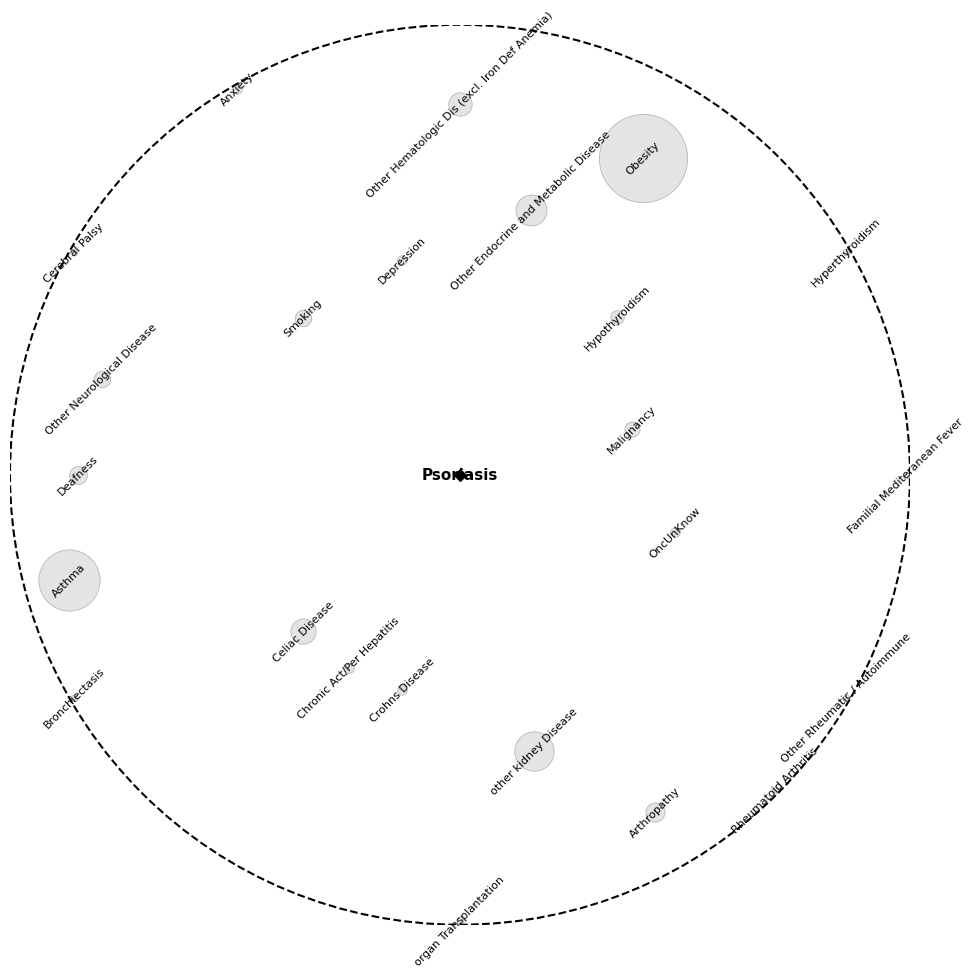

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
significant_df = results_df[(results_df['p_value'] < 0.05) & (results_df['OR'] > 0)].copy()
nonsignificant_df = results_df[(results_df['p_value'] >= 0.05) & (results_df['OR'] > 0)].copy()

# Compute distance from center
significant_df['Distance'] = 1 / significant_df['OR']
nonsignificant_df['Distance'] = 1 / nonsignificant_df['OR']

significant_df = significant_df[(significant_df['Distance'] <= 1) & (significant_df['Distance'] > 0.0001)]
nonsignificant_df = nonsignificant_df[(nonsignificant_df['Distance'] <= 1) & (nonsignificant_df['Distance'] > 0.0001)]

# Assign angles evenly
n_sig = len(significant_df)
n_nonsig = len(nonsignificant_df)

sig_angles = np.linspace(0, 2 * np.pi, n_sig, endpoint=False)
nonsig_angles = np.linspace(0, 2 * np.pi, n_nonsig, endpoint=False)

significant_df['x'] = significant_df['Distance'] * np.cos(sig_angles)
significant_df['y'] = significant_df['Distance'] * np.sin(sig_angles)

nonsignificant_df['x'] = nonsignificant_df['Distance'] * np.cos(nonsig_angles)
nonsignificant_df['y'] = nonsignificant_df['Distance'] * np.sin(nonsig_angles)

# ---- PLOTTING ----
fig, ax = plt.subplots(figsize=(10, 10))

# Plot non-significant bubbles (gray)
for _, row in nonsignificant_df.iterrows():
    radius = np.sqrt(row['Prevalence'])*100   # Adjust 50 as needed
    size = np.pi * radius ** 2
    ax.scatter(row['x'], row['y'],
               s=size,
               color='lightgray',
               edgecolors='gray',
               linewidths=0.5,
               alpha=0.6)
    ax.text(row['x'], row['y'],
            row['Comorbidity'],
            fontsize=8,
            ha='center',
            va='center',
            rotation=45)


# Plot significant bubbles (colored)
for _, row in significant_df.iterrows():
    radius = np.sqrt(row['Prevalence'])*100  # Adjust 50 as needed
    size = np.pi * radius ** 2
    ax.scatter(row['x'], row['y'],
               s=size,
               alpha=0.8,
               color='#e41a1c' if row['OR'] > 1 else '#4daf4a',
               edgecolors='black',
               linewidths=0.5)
    ax.text(row['x'], row['y'],
            row['Comorbidity'],
            fontsize=8,
            ha='center',
            va='center',
            rotation=45)

# Add dashed circle at OR = 1 (Distance = 1)
circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='--', linewidth=1.5)
ax.add_artist(circle)

# Psoriasis marker at center
ax.scatter(0, 0, marker='D', color='black', zorder=3)
ax.text(0, 0, 'Psoriasis', fontsize=11, fontweight='bold',
        color='black', ha='center', va='center', zorder=4)

# Layout settings
max_dist = max(significant_df['Distance'].max(), nonsignificant_df['Distance'].max()) + 0.5
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_aspect('equal')
ax.axis('off')

plt.tight_layout()
plt.show()


## Early Childhood (3-5 years old)

In [63]:
data_EC = data_copied[(3 <= data_copied['age']) & (data_copied['age'] <= 5)].copy()

In [64]:
data_EC

,date_of_birth,GroupName,age,sex,Start_D,DiagYear,Infertility,Psoriasis,Tuberculosis,Tuberculosis s/p,...,OncBone,OncSaracoma,OncGenitalia,Oncmyeloma,OncPolycythemiaVera,OncMyelodysplastic,OncLympholiferative,OncNeurofibromatosis,OncOther,OncUnKnow
126558,1996-03-31 00:00:00,Psoriasis,5,M,2002-12-29,2002.0,NaN,2013-03-01 00:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126559,1996-06-17 00:00:00,Control,5,M,2002-12-29,2002.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126911,1996-03-05 00:00:00,Control,5,M,2002-12-04,2002.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127166,1996-05-31 00:00:00,Psoriasis,5,M,2002-02-05,2002.0,NaN,2003-04-01 00:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127167,1996-11-20 00:00:00,Control,5,M,2002-02-05,2002.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280146,2013-01-10 00:00:00,Psoriasis,3,F,2016-02-16,2016.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280170,2014-01-14 00:00:00,Control,3,F,2017-08-29,2017.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280182,2014-01-15 00:00:00,Psoriasis,3,F,2017-11-20,2017.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280246,2014-01-31 00:00:00,Psoriasis,3,F,2017-04-23,2017.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
for col in selected_comorbidities:
    data_EC[col] = data_EC[col].notna().astype(int)

data_EC['Psoriasis'] = (data_EC['GroupName'].str.lower() == 'psoriasis').astype(int)

In [66]:
data_EC

,date_of_birth,GroupName,age,sex,Start_D,DiagYear,Infertility,Psoriasis,Tuberculosis,Tuberculosis s/p,...,OncBone,OncSaracoma,OncGenitalia,Oncmyeloma,OncPolycythemiaVera,OncMyelodysplastic,OncLympholiferative,OncNeurofibromatosis,OncOther,OncUnKnow
126558,1996-03-31 00:00:00,Psoriasis,5,M,2002-12-29,2002.0,NaN,1,0,0,...,0,0,0,0,0,0,0,0,0,0
126559,1996-06-17 00:00:00,Control,5,M,2002-12-29,2002.0,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
126911,1996-03-05 00:00:00,Control,5,M,2002-12-04,2002.0,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127166,1996-05-31 00:00:00,Psoriasis,5,M,2002-02-05,2002.0,NaN,1,0,0,...,0,0,0,0,0,0,0,0,0,0
127167,1996-11-20 00:00:00,Control,5,M,2002-02-05,2002.0,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280146,2013-01-10 00:00:00,Psoriasis,3,F,2016-02-16,2016.0,NaN,1,0,0,...,0,0,0,0,0,0,0,0,0,0
280170,2014-01-14 00:00:00,Control,3,F,2017-08-29,2017.0,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
280182,2014-01-15 00:00:00,Psoriasis,3,F,2017-11-20,2017.0,NaN,1,0,0,...,0,0,0,0,0,0,0,0,0,0
280246,2014-01-31 00:00:00,Psoriasis,3,F,2017-04-23,2017.0,NaN,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
import statsmodels.api as sm

results = []

for comorb in selected_comorbidities:
    try:
        # Remove rows with NaNs in either Psoriasis or the comorbidity
        subset = data_EC[['Psoriasis', 'sex', comorb]].dropna()

        if subset[comorb].nunique() < 2:
            continue  # skip comorbidities that are all 0 or all 1
        
        X = sm.add_constant(subset[comorb])
        y = subset['Psoriasis']

        model = sm.Logit(y, X)
        result = model.fit(disp=0)

        or_val = np.exp(result.params[comorb])
        conf_int = result.conf_int().loc[comorb]
        lower, upper = np.exp(conf_int[0]), np.exp(conf_int[1])
        pval = result.pvalues[comorb]
        prevalence = subset[comorb][subset['Psoriasis'] == 1].mean()


        results.append({
            'Comorbidity': comorb,
            'OR': or_val,
            'CI_lower': lower,
            'CI_upper': upper,
            'p_value': pval,
            'Prevalence': prevalence,
            'PsO_Count': subset[comorb][subset['Psoriasis'] == 1].sum(),
            'Female_PsO_Count': subset[comorb][(subset['Psoriasis'] == 1) & (subset['sex'] == 'F')].sum(),
            'Male_PsO_Count': subset[comorb][(subset['Psoriasis'] == 1) & (subset['sex'] == 'M')].sum()
        })
    except Exception as e:
        print(f"Skipped {comorb}: {e}")


/Users/kryptonempyrean/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/nb/j1cpyxn54656lsvpdckh21w80000gn/T/ipykernel_7554/614353298.py:21: RuntimeWarning: overflow encountered in exp
  lower, upper = np.exp(conf_int[0]), np.exp(conf_int[1])
/Users/kryptonempyrean/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/nb/j1cpyxn54656lsvpdckh21w80000gn/T/ipykernel_7554/614353298.py:21: RuntimeWarning: overflow encountered in exp
  lower, upper = np.exp(conf_int[0]), np.exp(conf_int[1])
/Users/kryptonempyrean/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood

Skipped OnclymphomaNonHodgkin: Singular matrix
Skipped OncNeurofibromatosis: Singular matrix


In [74]:
results

[{'Comorbidity': 'Tuberculosis s/p',
  'OR': 0.9943551888840653,
  'CI_lower': 0.062158240683816784,
  'CI_upper': 15.906856931330246,
  'p_value': 0.9968069374159321,
  'Prevalence': 0.00043402777777777775,
  'PsO_Count': 1,
  'Female_PsO_Count': 0,
  'Male_PsO_Count': 1},
 {'Comorbidity': 'Hepatitis B Carrier',
  'OR': 40480234.99558395,
  'CI_lower': 0.0,
  'CI_upper': inf,
  'p_value': 0.9978090798547334,
  'Prevalence': 0.00043402777777777775,
  'PsO_Count': 1,
  'Female_PsO_Count': 1,
  'Male_PsO_Count': 0},
 {'Comorbidity': 'Hepatitis C Carrier',
  'OR': 2.4424586458047998e-08,
  'CI_lower': 0.0,
  'CI_upper': inf,
  'p_value': 0.9978076951926207,
  'Prevalence': 0.0,
  'PsO_Count': 0,
  'Female_PsO_Count': 0,
  'Male_PsO_Count': 0},
 {'Comorbidity': 'Familial Mediteranean Fever',
  'OR': 1.4921773142112131,
  'CI_lower': 0.24910193370499306,
  'CI_upper': 8.938481945641996,
  'p_value': 0.6612356031127455,
  'Prevalence': 0.0013020833333333333,
  'PsO_Count': 3,
  'Female_PsO_C

In [75]:
results_df = pd.DataFrame(results)

# Filter only significant comorbidities (p < 0.05)
significant_df = results_df[results_df['p_value'] < 0.05].copy()
significant_df['Distance'] = 1 / significant_df['OR']
results_df['Distance'] = 1 / results_df['OR']


In [76]:
significant_df

,Comorbidity,OR,CI_lower,CI_upper,p_value,Prevalence,PsO_Count,Female_PsO_Count,Male_PsO_Count,Distance
42,Celiac Disease,2.751205,1.222342,6.192319,0.014485,0.009549,22,16,6,0.363477
44,Reflux Esophagitis / Gastritis / Deudenitis,2.340532,1.274727,4.297461,0.006090,0.015191,35,19,16,0.427253


In [81]:
results_df.head(74)

,Comorbidity,OR,CI_lower,CI_upper,p_value,Prevalence,PsO_Count,Female_PsO_Count,Male_PsO_Count,Distance
0,Tuberculosis s/p,9.943552e-01,0.062158,15.906857,0.996807,0.000434,1,0,1,1.005677e+00
1,Hepatitis B Carrier,4.048023e+07,0.000000,inf,0.997809,0.000434,1,1,0,2.470341e-08
2,Hepatitis C Carrier,2.442459e-08,0.000000,inf,0.997808,0.000000,0,0,0,4.094235e+07
3,Familial Mediteranean Fever,1.492177e+00,0.249102,8.938482,0.661236,0.001302,3,0,3,6.701616e-01
4,Malignancy,1.216359e+00,0.503093,2.940867,0.663689,0.004774,11,4,7,8.221257e-01
5,Benign Brain Tumor,2.442459e-08,0.000000,inf,0.997808,0.000000,0,0,0,4.094235e+07
6,Hyperthyroidism,2.482631e-01,0.027727,2.222881,0.212860,0.000434,1,1,0,4.027984e+00
7,Hypothyroidism,6.416972e-01,0.299912,1.372989,0.252975,0.004774,11,8,3,1.558367e+00
8,Diabetes,1.243475e+00,0.333488,4.636536,0.745539,0.002170,5,0,5,8.041976e-01
9,Hypo/Hyperparathyroidism,2.442459e-08,0.000000,inf,0.997808,0.000000,0,0,0,4.094235e+07


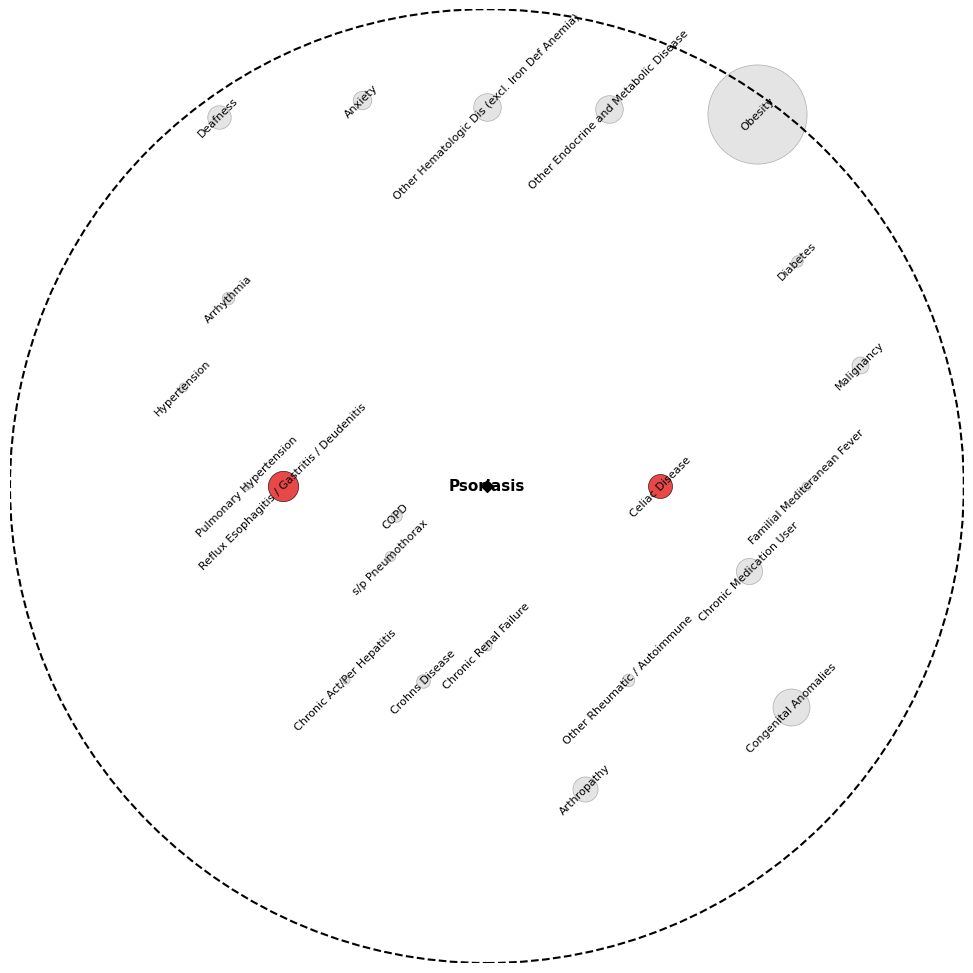

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
significant_df = results_df[(results_df['p_value'] < 0.05) & (results_df['OR'] > 0)].copy()
nonsignificant_df = results_df[(results_df['p_value'] >= 0.05) & (results_df['OR'] > 0)].copy()

# Compute distance from center
significant_df['Distance'] = 1 / significant_df['OR']
nonsignificant_df['Distance'] = 1 / nonsignificant_df['OR']

significant_df = significant_df[(significant_df['Distance'] <= 1) & (significant_df['Distance'] > 0.0001)]
nonsignificant_df = nonsignificant_df[(nonsignificant_df['Distance'] <= 1) & (nonsignificant_df['Distance'] > 0.0001)]

# Assign angles evenly
n_sig = len(significant_df)
n_nonsig = len(nonsignificant_df)

sig_angles = np.linspace(0, 2 * np.pi, n_sig, endpoint=False)
nonsig_angles = np.linspace(0, 2 * np.pi, n_nonsig, endpoint=False)

significant_df['x'] = significant_df['Distance'] * np.cos(sig_angles)
significant_df['y'] = significant_df['Distance'] * np.sin(sig_angles)

nonsignificant_df['x'] = nonsignificant_df['Distance'] * np.cos(nonsig_angles)
nonsignificant_df['y'] = nonsignificant_df['Distance'] * np.sin(nonsig_angles)

# ---- PLOTTING ----
fig, ax = plt.subplots(figsize=(10, 10))

# Plot non-significant bubbles (gray)
for _, row in nonsignificant_df.iterrows():
    radius = np.sqrt(row['Prevalence'])*100   # Adjust 50 as needed
    size = np.pi * radius ** 2
    ax.scatter(row['x'], row['y'],
               s=size,
               color='lightgray',
               edgecolors='gray',
               linewidths=0.5,
               alpha=0.6)
    ax.text(row['x'], row['y'],
            row['Comorbidity'],
            fontsize=8,
            ha='center',
            va='center',
            rotation=45)


# Plot significant bubbles (colored)
for _, row in significant_df.iterrows():
    radius = np.sqrt(row['Prevalence'])*100  # Adjust 50 as needed
    size = np.pi * radius ** 2
    ax.scatter(row['x'], row['y'],
               s=size,
               alpha=0.8,
               color='#e41a1c' if row['OR'] > 1 else '#4daf4a',
               edgecolors='black',
               linewidths=0.5)
    ax.text(row['x'], row['y'],
            row['Comorbidity'],
            fontsize=8,
            ha='center',
            va='center',
            rotation=45)

# Add dashed circle at OR = 1 (Distance = 1)
circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='--', linewidth=1.5)
ax.add_artist(circle)

# Psoriasis marker at center
ax.scatter(0, 0, marker='D', color='black', zorder=3)
ax.text(0, 0, 'Psoriasis', fontsize=11, fontweight='bold',
        color='black', ha='center', va='center', zorder=4)

# Layout settings
max_dist = max(significant_df['Distance'].max(), nonsignificant_df['Distance'].max()) + 0.5
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_aspect('equal')
ax.axis('off')

plt.tight_layout()
plt.show()


## Middle Childhood (6-11 Years Old)

In [92]:
data_MC= data_copied[(6 <= data_copied['age']) & (data_copied['age'] <= 11)].copy()

In [115]:
len(data_MC)

13399

In [94]:
for col in selected_comorbidities:
    data_MC[col] = data_MC[col].notna().astype(int)

data_MC['Psoriasis'] = (data_MC['GroupName'].str.lower() == 'psoriasis').astype(int)

In [ ]:
import statsmodels.api as sm

results = []

for comorb in selected_comorbidities:
    try:
        # Remove rows with NaNs in either Psoriasis or the comorbidity
        subset = data_MC[['Psoriasis', 'sex', comorb]].dropna()

        if subset[comorb].nunique() < 2:
            continue  # skip comorbidities that are all 0 or all 1
        
        X = sm.add_constant(subset[comorb])
        y = subset['Psoriasis']

        model = sm.Logit(y, X)
        result = model.fit(disp=0)

        or_val = np.exp(result.params[comorb])
        conf_int = result.conf_int().loc[comorb]
        lower, upper = np.exp(conf_int[0]), np.exp(conf_int[1])
        pval = result.pvalues[comorb]
        prevalence = subset[comorb][subset['Psoriasis'] == 1].mean()


        results.append({
            'Comorbidity': comorb,
            'OR': or_val,
            'CI_lower': lower,
            'CI_upper': upper,
            'p_value': pval,
            'Prevalence': prevalence,
            'PsO_Count': subset[comorb][subset['Psoriasis'] == 1].sum(),
            'Female_PsO_Count': subset[comorb][(subset['Psoriasis'] == 1) & (subset['sex'] == 'F')].sum(),
            'Male_PsO_Count': subset[comorb][(subset['Psoriasis'] == 1) & (subset['sex'] == 'M')].sum()
        })
    except Exception as e:
        print(f"Skipped {comorb}: {e}")

In [96]:
results_df = pd.DataFrame(results)

# Filter only significant comorbidities (p < 0.001)
significant_df = results_df[results_df['p_value'] < 0.05].copy()
significant_df['Distance'] = 1 / significant_df['OR']

In [97]:
significant_df

,Comorbidity,OR,CI_lower,CI_upper,p_value,Prevalence,PsO_Count,Female_PsO_Count,Male_PsO_Count,Distance
12,Obesity,1.314620,1.205237,1.433931,6.757284e-10,0.210315,1411,762,649,0.760676
13,Hyperlipidemia,1.424973,1.100776,1.844652,7.167021e-03,0.021166,142,97,45,0.701768
17,Other Hematologic Dis (excl. Iron Def Anemia),1.521604,1.063166,2.177722,2.174358e-02,0.011328,76,41,35,0.657201
27,Cerebral Palsy,0.389377,0.180041,0.842109,1.654753e-02,0.001341,9,2,7,2.568205
36,Deafness,1.808686,1.233067,2.653015,2.430871e-03,0.011030,74,37,37,0.552887
52,Bronchiectasis,0.124516,0.015569,0.995815,4.953972e-02,0.000149,1,1,0,8.031128
70,Arthropathy,1.417853,1.066429,1.885083,1.628202e-02,0.017290,116,78,38,0.705292
72,Rheumatoid Arthritis,4.997758,1.707342,14.629510,3.323286e-03,0.002981,20,15,5,0.200090


In [98]:
results_df

,Comorbidity,OR,CI_lower,CI_upper,p_value,Prevalence,PsO_Count,Female_PsO_Count,Male_PsO_Count
0,Tuberculosis,1.501652e+06,0.000000e+00,inf,9.869214e-01,0.000298,2,1,1
1,Tuberculosis s/p,1.994632e+00,1.808233e-01,2.200247e+01,5.729570e-01,0.000298,2,1,1
2,Hepatitis B Carrier,9.971667e-01,2.011912e-01,4.942271e+00,9.972280e-01,0.000447,3,1,2
3,Hepatitis C Carrier,6.986422e+00,8.593363e-01,5.679975e+01,6.903686e-02,0.001043,7,2,5
4,Familial Mediteranean Fever,1.127728e+00,6.428385e-01,1.978368e+00,6.750965e-01,0.003875,26,14,12
5,Amyloidosis,9.971671e-01,1.404234e-01,7.081032e+00,9.977368e-01,0.000298,2,1,1
6,Malignancy,1.321941e+00,8.457282e-01,2.066298e+00,2.206838e-01,0.006707,45,23,22
7,Benign Brain Tumor,4.269666e-10,0.000000e+00,inf,9.996438e-01,0.000000,0,0,0
8,Hyperthyroidism,2.121825e+00,9.150884e-01,4.919896e+00,7.957296e-02,0.002534,17,14,3
9,Hypothyroidism,1.277971e+00,9.370676e-01,1.742894e+00,1.212935e-01,0.013713,92,70,22


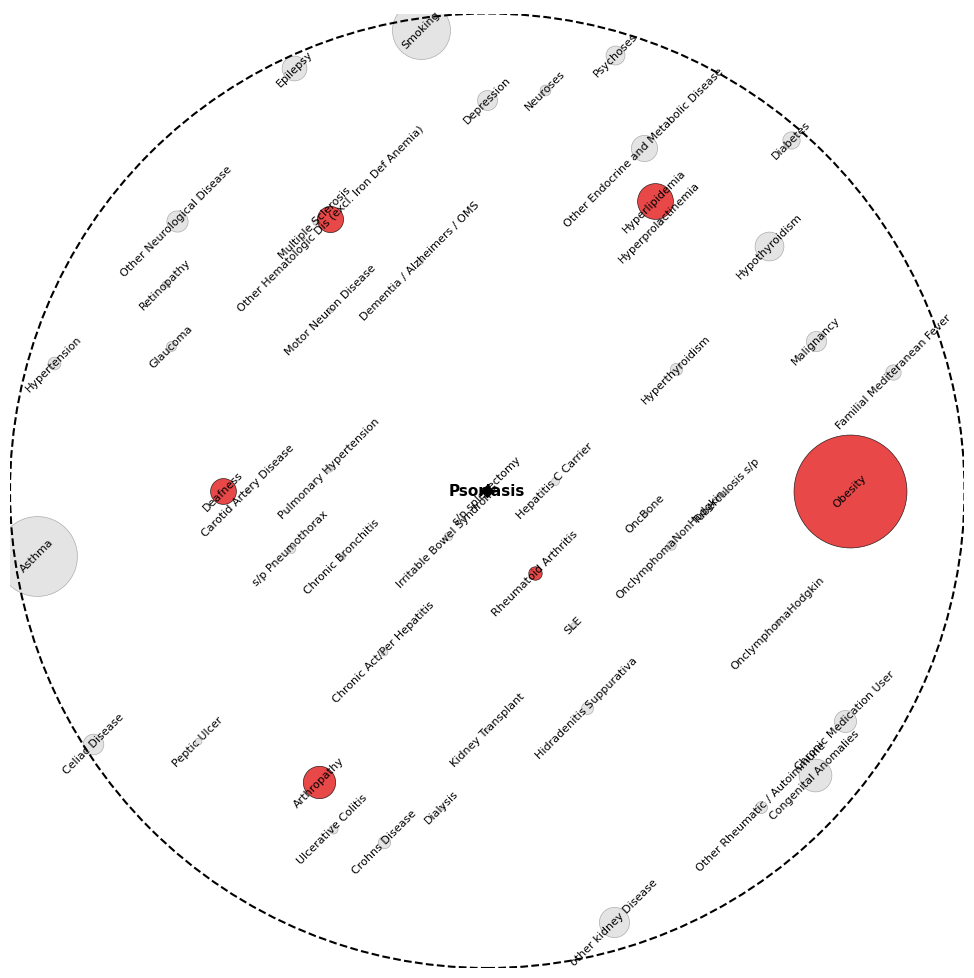

In [99]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
significant_df = results_df[(results_df['p_value'] < 0.05) & (results_df['OR'] > 0)].copy()
nonsignificant_df = results_df[(results_df['p_value'] >= 0.05) & (results_df['OR'] > 0)].copy()

# Compute distance from center
significant_df['Distance'] = 1 / significant_df['OR']
nonsignificant_df['Distance'] = 1 / nonsignificant_df['OR']

significant_df = significant_df[(significant_df['Distance'] <= 1) & (significant_df['Distance'] > 0.0001)]
nonsignificant_df = nonsignificant_df[(nonsignificant_df['Distance'] <= 1) & (nonsignificant_df['Distance'] > 0.0001)]

# Assign angles evenly
n_sig = len(significant_df)
n_nonsig = len(nonsignificant_df)

sig_angles = np.linspace(0, 2 * np.pi, n_sig, endpoint=False)
nonsig_angles = np.linspace(0, 2 * np.pi, n_nonsig, endpoint=False)

significant_df['x'] = significant_df['Distance'] * np.cos(sig_angles)
significant_df['y'] = significant_df['Distance'] * np.sin(sig_angles)

nonsignificant_df['x'] = nonsignificant_df['Distance'] * np.cos(nonsig_angles)
nonsignificant_df['y'] = nonsignificant_df['Distance'] * np.sin(nonsig_angles)

# ---- PLOTTING ----
fig, ax = plt.subplots(figsize=(10, 10))

# Plot non-significant bubbles (gray)
for _, row in nonsignificant_df.iterrows():
    radius = np.sqrt(row['Prevalence'])*100   # Adjust 50 as needed
    size = np.pi * radius ** 2
    ax.scatter(row['x'], row['y'],
               s=size,
               color='lightgray',
               edgecolors='gray',
               linewidths=0.5,
               alpha=0.6)
    ax.text(row['x'], row['y'],
            row['Comorbidity'],
            fontsize=8,
            ha='center',
            va='center',
            rotation=45)


# Plot significant bubbles (colored)
for _, row in significant_df.iterrows():
    radius = np.sqrt(row['Prevalence'])*100  # Adjust 50 as needed
    size = np.pi * radius ** 2
    ax.scatter(row['x'], row['y'],
               s=size,
               alpha=0.8,
               color='#e41a1c' if row['OR'] > 1 else '#4daf4a',
               edgecolors='black',
               linewidths=0.5)
    ax.text(row['x'], row['y'],
            row['Comorbidity'],
            fontsize=8,
            ha='center',
            va='center',
            rotation=45)

# Add dashed circle at OR = 1 (Distance = 1)
circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='--', linewidth=1.5)
ax.add_artist(circle)

# Psoriasis marker at center
ax.scatter(0, 0, marker='D', color='black', zorder=3)
ax.text(0, 0, 'Psoriasis', fontsize=11, fontweight='bold',
        color='black', ha='center', va='center', zorder=4)

# Layout settings
max_dist = max(significant_df['Distance'].max(), nonsignificant_df['Distance'].max()) + 0.5
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_aspect('equal')
ax.axis('off')

plt.tight_layout()
plt.show()


## Early Adolescence (12-18 years old)

In [100]:
data_EA= data_copied[(12 <= data_copied['age']) & (data_copied['age'] <= 18)].copy()

In [101]:
for col in selected_comorbidities:
    data_EA[col] = data_EA[col].notna().astype(int)

data_EA['Psoriasis'] = (data_EA['GroupName'].str.lower() == 'psoriasis').astype(int)

In [116]:
len(data_EA)

17583

In [ ]:
import statsmodels.api as sm

results = []

for comorb in selected_comorbidities:
    try:
        # Remove rows with NaNs in either Psoriasis or the comorbidity
        subset = data_EA[['Psoriasis', 'sex', comorb]].dropna()

        if subset[comorb].nunique() < 2:
            continue  # skip comorbidities that are all 0 or all 1
        
        X = sm.add_constant(subset[comorb])
        y = subset['Psoriasis']

        model = sm.Logit(y, X)
        result = model.fit(disp=0)

        or_val = np.exp(result.params[comorb])
        conf_int = result.conf_int().loc[comorb]
        lower, upper = np.exp(conf_int[0]), np.exp(conf_int[1])
        pval = result.pvalues[comorb]
        prevalence = subset[comorb][subset['Psoriasis'] == 1].mean()


        results.append({
            'Comorbidity': comorb,
            'OR': or_val,
            'CI_lower': lower,
            'CI_upper': upper,
            'p_value': pval,
            'Prevalence': prevalence,
            'PsO_Count': subset[comorb][subset['Psoriasis'] == 1].sum(),
            'Female_PsO_Count': subset[comorb][(subset['Psoriasis'] == 1) & (subset['sex'] == 'F')].sum(),
            'Male_PsO_Count': subset[comorb][(subset['Psoriasis'] == 1) & (subset['sex'] == 'M')].sum()
        })
    except Exception as e:
        print(f"Skipped {comorb}: {e}")

In [103]:
results_df = pd.DataFrame(results)

# Filter only significant comorbidities (p < 0.001)
significant_df = results_df[results_df['p_value'] < 0.05].copy()
significant_df['Distance'] = 1 / significant_df['OR']

In [104]:
significant_df

,Comorbidity,OR,CI_lower,CI_upper,p_value,Prevalence,PsO_Count,Female_PsO_Count,Male_PsO_Count,Distance
3,Hepatitis B Carrier,0.333979,0.121331,0.919318,3.377075e-02,0.000570,5,4,1,2.994198
5,Familial Mediteranean Fever,1.962884,1.159089,3.324087,1.209850e-02,0.004671,41,25,16,0.509455
10,Hypothyroidism,1.358727,1.106338,1.668694,3.457672e-03,0.024835,218,174,44,0.735983
11,Diabetes,2.175513,1.479191,3.199626,7.847205e-05,0.009342,82,51,31,0.459662
14,Obesity,1.403921,1.292432,1.525027,9.252834e-16,0.175325,1539,816,723,0.712291
15,Hyperlipidemia,1.330955,1.144075,1.548360,2.126020e-04,0.046024,404,291,113,0.751340
22,Depression,1.414812,1.084168,1.846295,1.061857e-02,0.015038,132,82,50,0.706807
23,Anxiety,1.450264,1.128537,1.863710,3.674086e-03,0.017202,151,91,60,0.689530
55,Chronic Bronchitis,0.200433,0.043904,0.915023,3.802456e-02,0.000228,2,1,1,4.989198
57,Celiac Disease,1.963050,1.332823,2.891281,6.396046e-04,0.008658,76,54,22,0.509411


In [106]:
results_df

,Comorbidity,OR,CI_lower,CI_upper,p_value,Prevalence,PsO_Count,Female_PsO_Count,Male_PsO_Count
0,Tuberculosis,3.342828e-01,0.034765,3.214258,3.426807e-01,0.000114,1,1,0
1,Tuberculosis s/p,7.019154e-01,0.267062,1.844837,4.728295e-01,0.000797,7,4,3
2,Syphilis / Gonorrhea,2.506836e-01,0.028013,2.243287,2.159444e-01,0.000114,1,0,1
3,Hepatitis B Carrier,3.339793e-01,0.121331,0.919318,3.377075e-02,0.000570,5,4,1
4,Hepatitis C Carrier,1.289966e+00,0.480199,3.465260,6.135506e-01,0.001025,9,6,3
5,Familial Mediteranean Fever,1.962884e+00,1.159089,3.324087,1.209850e-02,0.004671,41,25,16
6,Amyloidosis,6.021888e+00,0.724837,50.029375,9.650154e-02,0.000684,6,2,4
7,Malignancy,1.069711e+00,0.781125,1.464915,6.744217e-01,0.009228,81,48,33
8,Benign Brain Tumor,1.504786e+00,0.251381,9.007786,6.544466e-01,0.000342,3,2,1
9,Hyperthyroidism,9.313259e-01,0.437520,1.982467,8.535630e-01,0.001481,13,10,3


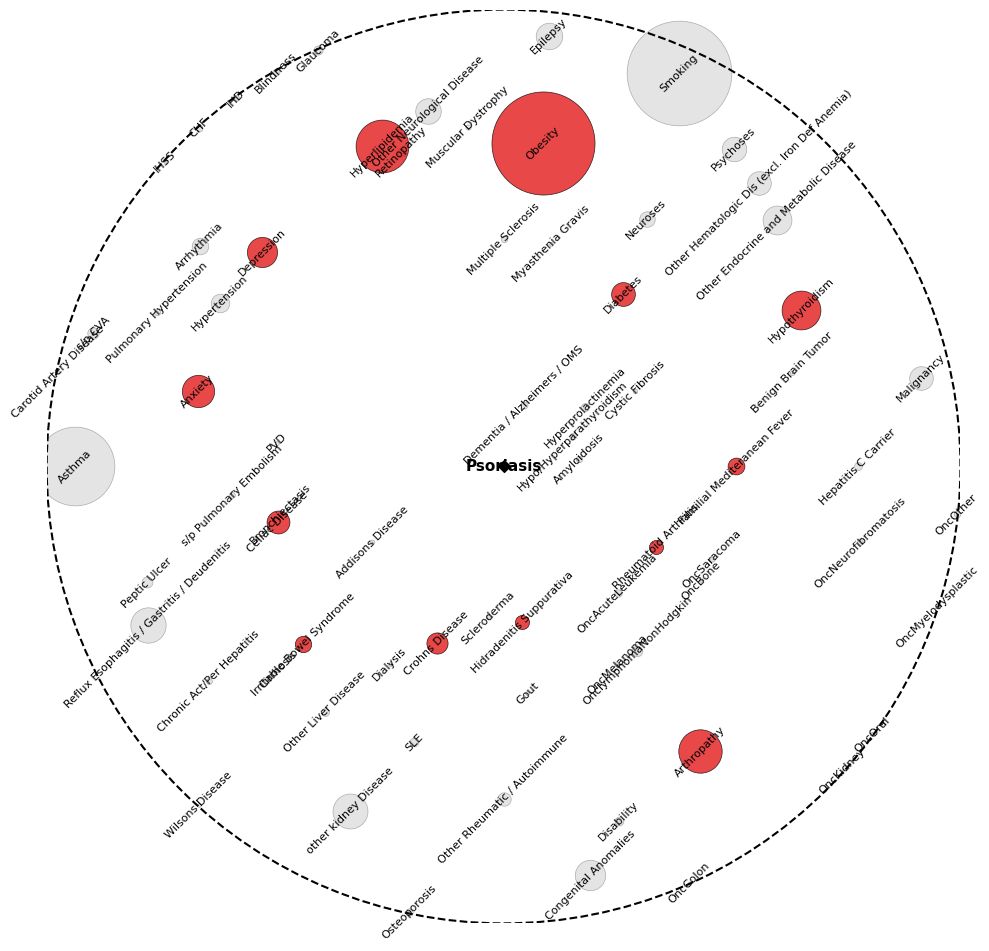

In [107]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
significant_df = results_df[(results_df['p_value'] < 0.05) & (results_df['OR'] > 0)].copy()
nonsignificant_df = results_df[(results_df['p_value'] >= 0.05) & (results_df['OR'] > 0)].copy()

# Compute distance from center
significant_df['Distance'] = 1 / significant_df['OR']
nonsignificant_df['Distance'] = 1 / nonsignificant_df['OR']

significant_df = significant_df[(significant_df['Distance'] <= 1) & (significant_df['Distance'] > 0.0001)]
nonsignificant_df = nonsignificant_df[(nonsignificant_df['Distance'] <= 1) & (nonsignificant_df['Distance'] > 0.0001)]

# Assign angles evenly
n_sig = len(significant_df)
n_nonsig = len(nonsignificant_df)

sig_angles = np.linspace(0, 2 * np.pi, n_sig, endpoint=False)
nonsig_angles = np.linspace(0, 2 * np.pi, n_nonsig, endpoint=False)

significant_df['x'] = significant_df['Distance'] * np.cos(sig_angles)
significant_df['y'] = significant_df['Distance'] * np.sin(sig_angles)

nonsignificant_df['x'] = nonsignificant_df['Distance'] * np.cos(nonsig_angles)
nonsignificant_df['y'] = nonsignificant_df['Distance'] * np.sin(nonsig_angles)

# ---- PLOTTING ----
fig, ax = plt.subplots(figsize=(10, 10))

# Plot non-significant bubbles (gray)
for _, row in nonsignificant_df.iterrows():
    radius = np.sqrt(row['Prevalence'])*100   # Adjust 50 as needed
    size = np.pi * radius ** 2
    ax.scatter(row['x'], row['y'],
               s=size,
               color='lightgray',
               edgecolors='gray',
               linewidths=0.5,
               alpha=0.6)
    ax.text(row['x'], row['y'],
            row['Comorbidity'],
            fontsize=8,
            ha='center',
            va='center',
            rotation=45)


# Plot significant bubbles (colored)
for _, row in significant_df.iterrows():
    radius = np.sqrt(row['Prevalence'])*100  # Adjust 50 as needed
    size = np.pi * radius ** 2
    ax.scatter(row['x'], row['y'],
               s=size,
               alpha=0.8,
               color='#e41a1c' if row['OR'] > 1 else '#4daf4a',
               edgecolors='black',
               linewidths=0.5)
    ax.text(row['x'], row['y'],
            row['Comorbidity'],
            fontsize=8,
            ha='center',
            va='center',
            rotation=45)

# Add dashed circle at OR = 1 (Distance = 1)
circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='--', linewidth=1.5)
ax.add_artist(circle)

# Psoriasis marker at center
ax.scatter(0, 0, marker='D', color='black', zorder=3)
ax.text(0, 0, 'Psoriasis', fontsize=11, fontweight='bold',
        color='black', ha='center', va='center', zorder=4)

# Layout settings
max_dist = max(significant_df['Distance'].max(), nonsignificant_df['Distance'].max()) + 0.5
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_aspect('equal')
ax.axis('off')

plt.tight_layout()
plt.show()


## Late Adolescence (19-21 years old)

In [108]:
data_LA= data_copied[(19 <= data_copied['age']) & (data_copied['age'] <= 21)].copy()

In [109]:
for col in selected_comorbidities:
    data_LA[col] = data_LA[col].notna().astype(int)

data_LA['Psoriasis'] = (data_LA['GroupName'].str.lower() == 'psoriasis').astype(int)

In [117]:
len(data_LA)

7489

In [ ]:
import statsmodels.api as sm

results = []

for comorb in selected_comorbidities:
    try:
        # Remove rows with NaNs in either Psoriasis or the comorbidity
        subset = data_LA[['Psoriasis', 'sex', comorb]].dropna()

        if subset[comorb].nunique() < 2:
            continue  # skip comorbidities that are all 0 or all 1
        
        X = sm.add_constant(subset[comorb])
        y = subset['Psoriasis']

        model = sm.Logit(y, X)
        result = model.fit(disp=0)

        or_val = np.exp(result.params[comorb])
        conf_int = result.conf_int().loc[comorb]
        lower, upper = np.exp(conf_int[0]), np.exp(conf_int[1])
        pval = result.pvalues[comorb]
        prevalence = subset[comorb][subset['Psoriasis'] == 1].mean()


        results.append({
            'Comorbidity': comorb,
            'OR': or_val,
            'CI_lower': lower,
            'CI_upper': upper,
            'p_value': pval,
            'Prevalence': prevalence,
            'PsO_Count': subset[comorb][subset['Psoriasis'] == 1].sum(),
            'Female_PsO_Count': subset[comorb][(subset['Psoriasis'] == 1) & (subset['sex'] == 'F')].sum(),
            'Male_PsO_Count': subset[comorb][(subset['Psoriasis'] == 1) & (subset['sex'] == 'M')].sum()
        })
    except Exception as e:
        print(f"Skipped {comorb}: {e}")

In [111]:
results_df = pd.DataFrame(results)

# Filter only significant comorbidities (p < 0.05)
significant_df = results_df[results_df['p_value'] < 0.05].copy()
significant_df['Distance'] = 1 / significant_df['OR']

In [112]:
significant_df

,Comorbidity,OR,CI_lower,CI_upper,p_value,Prevalence,PsO_Count,Female_PsO_Count,Male_PsO_Count,Distance
14,Obesity,1.184187,1.034213,1.355910,0.014410,0.138593,520,308,212,0.844461
43,Hypertension,1.960216,1.183668,3.246221,0.008920,0.011994,45,26,19,0.510148
58,Reflux Esophagitis / Gastritis / Deudenitis,1.563245,1.171734,2.085571,0.002386,0.032249,121,83,38,0.639695
65,Crohns Disease,2.201775,1.193920,4.060414,0.011485,0.008795,33,21,12,0.454179


In [113]:
results_df

,Comorbidity,OR,CI_lower,CI_upper,p_value,Prevalence,PsO_Count,Female_PsO_Count,Male_PsO_Count
0,Tuberculosis,9.960011e-01,0.062276,15.929471,0.997740,0.000267,1,1,0
1,Tuberculosis s/p,1.328353e+00,0.297098,5.939190,0.710195,0.001066,4,2,2
2,Syphilis / Gonorrhea,7.995837e-07,0.000000,inf,0.989962,0.000000,0,0,0
3,Hepatitis B Carrier,8.144658e-01,0.337116,1.967733,0.648399,0.002399,9,7,2
4,Hepatitis C Carrier,7.963675e-01,0.313959,2.020012,0.631617,0.002132,8,1,7
5,Familial Mediteranean Fever,1.121083e+00,0.570831,2.201749,0.739968,0.004797,18,11,7
6,Amyloidosis,3.318226e-01,0.034501,3.191434,0.339492,0.000267,1,1,0
7,Malignancy,7.594223e-01,0.522028,1.104773,0.150161,0.013060,49,35,14
8,Benign Brain Tumor,9.960000e-01,0.140227,7.074379,0.996803,0.000533,2,2,0
9,Hyperthyroidism,5.677617e-01,0.278939,1.155643,0.118515,0.003198,12,11,1


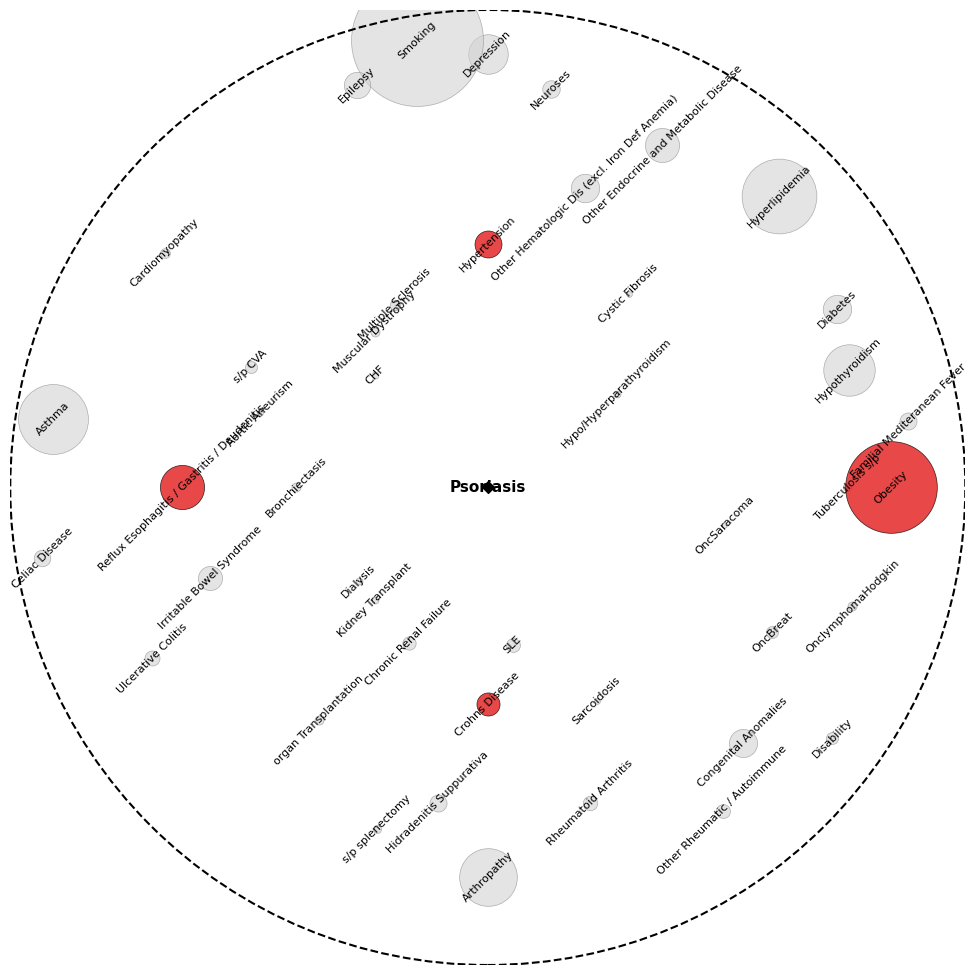

In [114]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
significant_df = results_df[(results_df['p_value'] < 0.05) & (results_df['OR'] > 0)].copy()
nonsignificant_df = results_df[(results_df['p_value'] >= 0.05) & (results_df['OR'] > 0)].copy()

# Compute distance from center
significant_df['Distance'] = 1 / significant_df['OR']
nonsignificant_df['Distance'] = 1 / nonsignificant_df['OR']

significant_df = significant_df[(significant_df['Distance'] <= 1) & (significant_df['Distance'] > 0.0001)]
nonsignificant_df = nonsignificant_df[(nonsignificant_df['Distance'] <= 1) & (nonsignificant_df['Distance'] > 0.0001)]

# Assign angles evenly
n_sig = len(significant_df)
n_nonsig = len(nonsignificant_df)

sig_angles = np.linspace(0, 2 * np.pi, n_sig, endpoint=False)
nonsig_angles = np.linspace(0, 2 * np.pi, n_nonsig, endpoint=False)

significant_df['x'] = significant_df['Distance'] * np.cos(sig_angles)
significant_df['y'] = significant_df['Distance'] * np.sin(sig_angles)

nonsignificant_df['x'] = nonsignificant_df['Distance'] * np.cos(nonsig_angles)
nonsignificant_df['y'] = nonsignificant_df['Distance'] * np.sin(nonsig_angles)

# ---- PLOTTING ----
fig, ax = plt.subplots(figsize=(10, 10))

# Plot non-significant bubbles (gray)
for _, row in nonsignificant_df.iterrows():
    radius = np.sqrt(row['Prevalence'])*100   # Adjust 50 as needed
    size = np.pi * radius ** 2
    ax.scatter(row['x'], row['y'],
               s=size,
               color='lightgray',
               edgecolors='gray',
               linewidths=0.5,
               alpha=0.6)
    ax.text(row['x'], row['y'],
            row['Comorbidity'],
            fontsize=8,
            ha='center',
            va='center',
            rotation=45)


# Plot significant bubbles (colored)
for _, row in significant_df.iterrows():
    radius = np.sqrt(row['Prevalence'])*100  # Adjust 50 as needed
    size = np.pi * radius ** 2
    ax.scatter(row['x'], row['y'],
               s=size,
               alpha=0.8,
               color='#e41a1c' if row['OR'] > 1 else '#4daf4a',
               edgecolors='black',
               linewidths=0.5)
    ax.text(row['x'], row['y'],
            row['Comorbidity'],
            fontsize=8,
            ha='center',
            va='center',
            rotation=45)

# Add dashed circle at OR = 1 (Distance = 1)
circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='--', linewidth=1.5)
ax.add_artist(circle)

# Psoriasis marker at center
ax.scatter(0, 0, marker='D', color='black', zorder=3)
ax.text(0, 0, 'Psoriasis', fontsize=11, fontweight='bold',
        color='black', ha='center', va='center', zorder=4)

# Layout settings
max_dist = max(significant_df['Distance'].max(), nonsignificant_df['Distance'].max()) + 0.5
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_aspect('equal')
ax.axis('off')

plt.tight_layout()
plt.show()
